# **DRLFoil**: Quick Tutorial

In [ ]:
import sys
import os
sys.path.insert(0, 'C:/Users/pablomaga/Documents/GitHub/DRLFoil')
os.chdir('..')

### 1. Single Optimization

In [5]:
import drlfoil

In [ ]:
optimization = drlfoil.Optimize('nobox', 0.3, 1e7)
optimization.run()

In [ ]:
optimization.reset(cl_target=1.0)
optimization.run()

### 2. Box Restriction optimization

In [2]:
import drlfoil
from drlfoil import BoxRestriction

BoxRestriction should have the form *(xpos, ypos, width, heigh)*. Remember that dimensions are normalize in order to have a chord of 1

In [ ]:
optimization = drlfoil.Optimize('onebox', 0.8, 1e7, steps = 12, logs=1, boxes=[BoxRestriction(0.4, 0.0, 0.4, 0.15)])
optimization.run()

In [ ]:
optimization = drlfoil.Optimize('twobox', 0.5, 1e7, steps = 12, logs=1, boxes=[BoxRestriction(0.3, 0.05, 0.12, 0.12), BoxRestriction(0.7, 0.03, 0.2, 0.1)])
optimization.run()

In [4]:
optimization.save('poorfoil')

### 3. Airfoil analysis

#### 3.1. Optimized Airfoil analysis

In [66]:
import drlfoil
from drlfoil import BoxRestriction

*** Loading model from C:\Users\pablomaga\Documents\GitHub\DRLFoil\drlfoil\models\onebox\onebox.zip ***
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
***Best airfoil found with a lift coefficient of 0.3488724606510598 (target: 0.5) and efficiency of 8.675236038480751


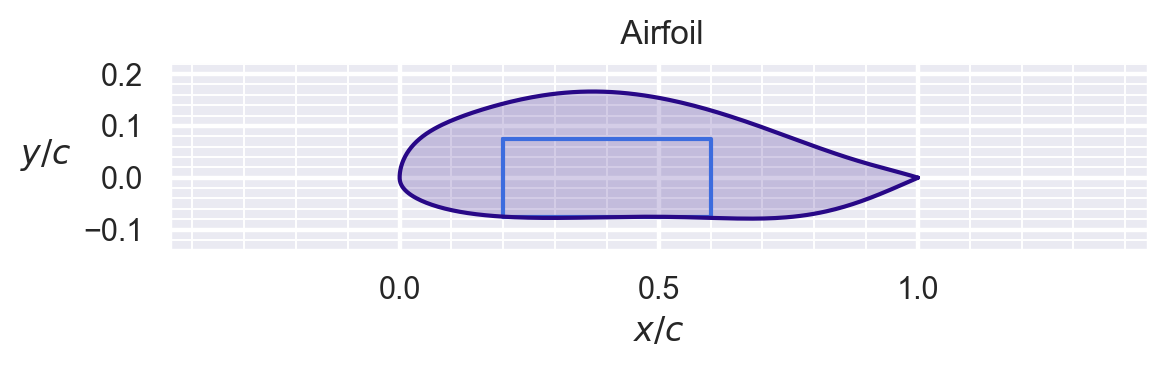

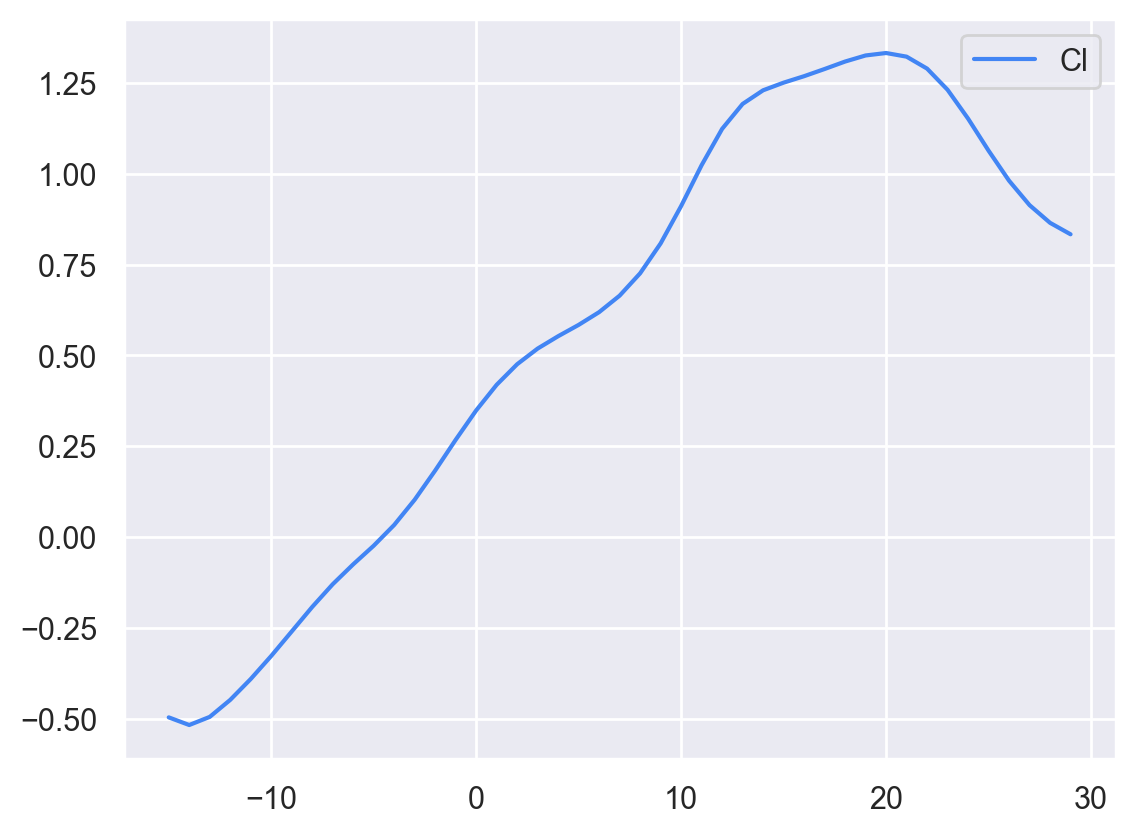

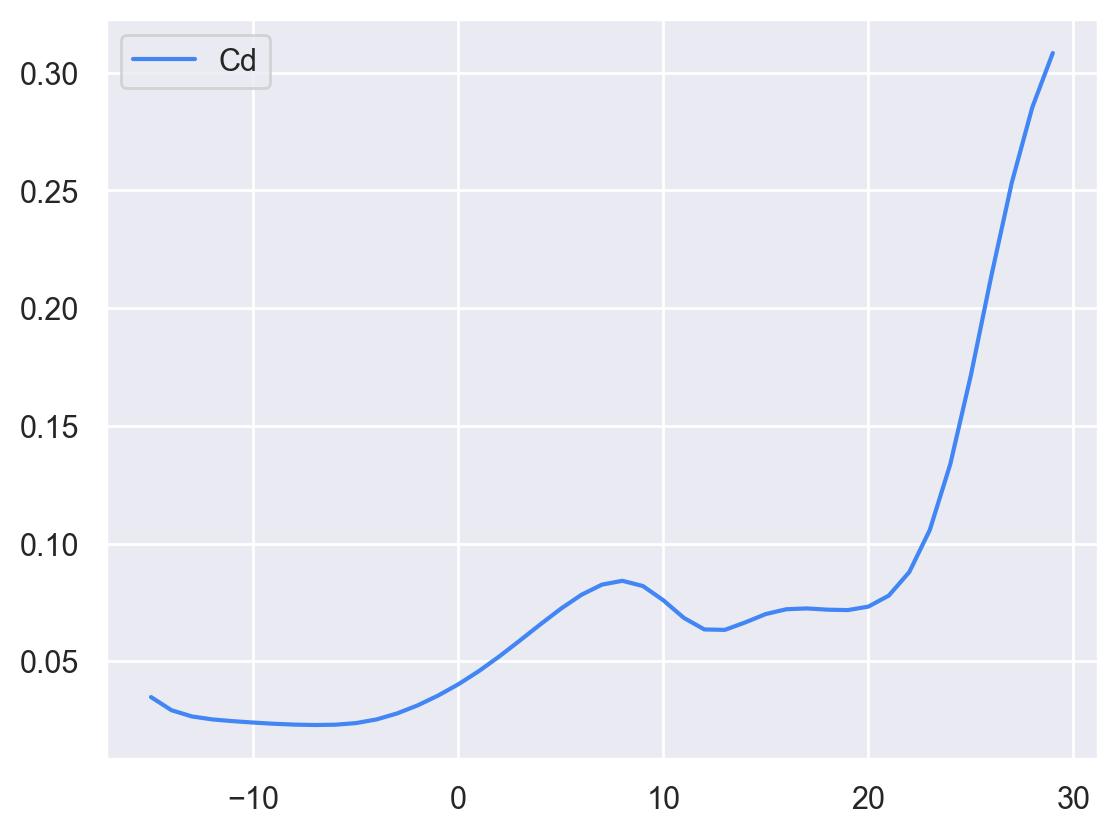

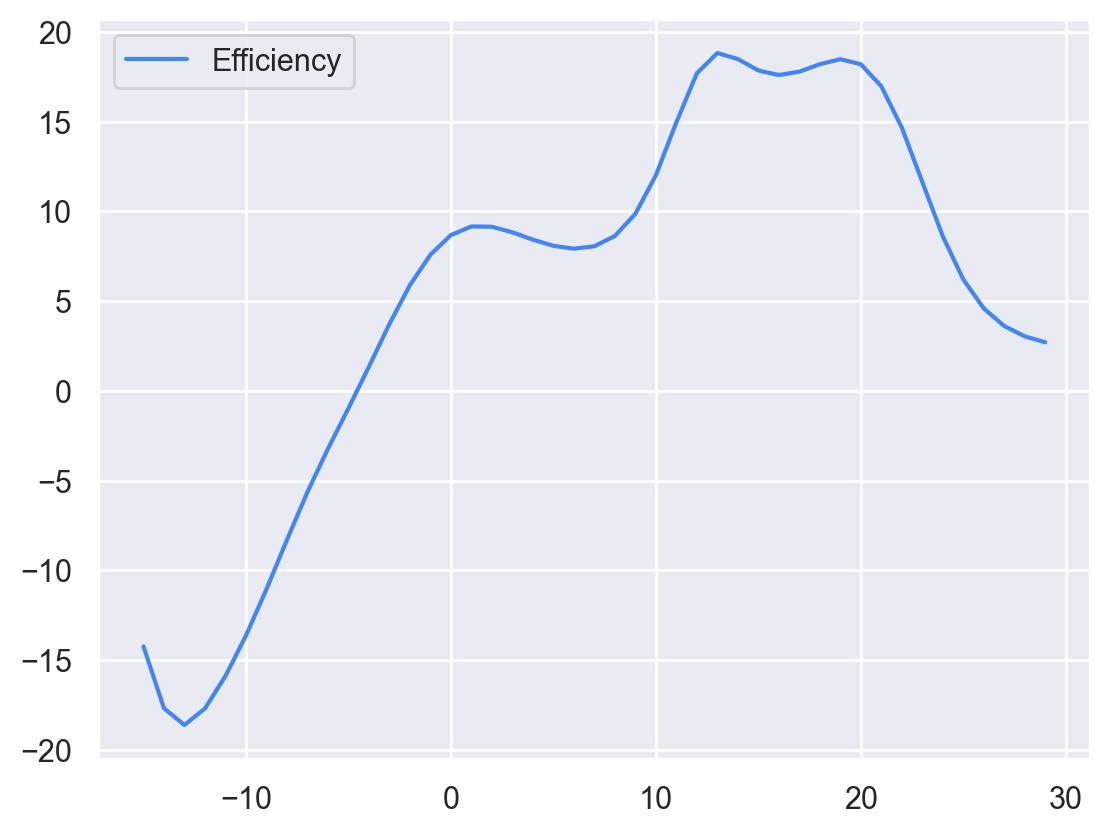

In [76]:
optimization = drlfoil.Optimize('onebox', 0.5, 2e5, steps = 12, logs=1, boxes=[BoxRestriction(0.4, 0.0, 0.4, 0.15)])
optimization.run()
results = optimization.analyze(plot=True)

#### 3.2. Custom airfoil analysis

In [9]:
from drlfoil.utilities import AeroAnalysis
from drlfoil.airfoil_env import AirfoilTools
import numpy as np

In [23]:
myairfoil = AirfoilTools()
myairfoil.kulfan(0.2*np.ones(10), 0.0*np.ones(10), 0.13)

In [ ]:
myairfoil.airfoil_plot()

In [ ]:
analysis_results = AeroAnalysis(myairfoil, reynolds=1e7, plot=True)
print(f"The highest Cl reached is: {max(analysis_results['cl'])}")